In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df15 = pd.read_csv("../../Dataset/02-03-2018(Time).csv", low_memory = False)
df15 = df15.drop([0,1])
df15['Timestamp']= pd.to_datetime(df15['Timestamp'])
df15 = df15.sort_values(by=['Timestamp'])
df15 = df15.drop(columns = ['Timestamp'])

In [3]:
df15

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
234326,3389.0,0,6.0,0,1708771.0,0,8.0,0,7.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
954264,3389.0,0,6.0,0,4387548.0,0,10.0,0,7.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215351,8080.0,0,6.0,0,10163.0,0,3.0,0,4.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733281,57935.0,0,6.0,0,159.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106890,8080.0,0,6.0,0,11345.0,0,3.0,0,4.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142291,8080.0,0,6.0,0,10895.0,0,3.0,0,4.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042191,445.0,0,6.0,0,1253148.0,0,7.0,0,5.0,0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838119,3389.0,0,6.0,0,1676164.0,0,8.0,0,7.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
430133,51109.0,0,6.0,0,32.0,0,1.0,0,1.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df16Aux = pd.read_csv("../../Dataset/14-02-2018(Time).csv", low_memory = False)
df16Aux = df16Aux.drop([0,1])
df16Aux['Timestamp']= pd.to_datetime(df16Aux['Timestamp'])
df16Aux = df16Aux.sort_values(by=['Timestamp'])
df16Aux = df16Aux.drop(columns = ['Timestamp'])

In [5]:
listOrd = df15.columns.tolist()
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [6]:
df16Aux = None

In [7]:
df16

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
410758,0.0,0,0.0,0,-11873000000.0,0,2.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410759,0.0,0,0.0,0,-681402000000.0,0,3.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410760,0.0,0,0.0,0,-919011000000.0,0,81.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,284112452380.952,193152417061.482,754847000000.0,12603000000.0
410761,0.0,0,0.0,0,-273850000000.0,0,282.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,339450312500.0,243268209256.922,979781000000.0,7758000000.0
411984,0.0,0,0.0,0,-529801000000.0,0,505.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,333755554687.5,237751721149.946,948431000000.0,4908000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720761,3389.0,0,6.0,0,5120281.0,0,11.0,0,8.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
871091,0.0,0,0.0,0,112636522.0,0,3.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56318261.0,42.4264068712,56318291.0,56318231.0
876765,445.0,0,6.0,0,330963.0,0,6.0,0,5.0,0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795036,3389.0,0,6.0,0,2056637.0,0,8.0,0,7.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)
output_label15 = np.array(df15["Label"])
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15= out

In [9]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)
output_label16 = np.array(df16["Label"])
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [10]:
dfAE = pd.concat([df15, df16])
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)
output_labelAE = np.array(dfAE["Label"])
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [11]:
dfAE = None
df15 = None
df16 = None
out = None

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

## AutoEncoder

In [13]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)

In [14]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [15]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [16]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [17]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [18]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
47009/47009 [==============================] - 59s 1ms/step - loss: 0.0274 - accuracy: 0.1277 - val_loss: 0.0159 - val_accuracy: 0.0222
Epoch 2/10
47009/47009 [==============================] - 50s 1ms/step - loss: 0.0159 - accuracy: 0.1673 - val_loss: 0.0159 - val_accuracy: 0.0073
Epoch 3/10
47009/47009 [==============================] - 50s 1ms/step - loss: 0.0159 - accuracy: 0.1816 - val_loss: 0.0159 - val_accuracy: 0.0105
Epoch 4/10
47009/47009 [==============================] - 50s 1ms/step - loss: 0.0159 - accuracy: 0.1898 - val_loss: 0.0159 - val_accuracy: 0.4480
Epoch 5/10
47009/47009 [==============================] - 50s 1ms/step - loss: 0.0159 - accuracy: 0.1945 - val_loss: 0.0159 - val_accuracy: 0.2687
Epoch 6/10
47009/47009 [==============================] - 51s 1ms/step - loss: 0.0159 - accuracy: 0.1994 - val_loss: 0.0159 - val_accuracy: 0.2213
Epoch 7/10
47009/47009 [==============================] - 52s 1ms/step - loss: 0.0159 - accuracy: 0.2005 - val_loss: 0

In [19]:
predict = auto_encoder.predict(inp_test)
losses = keras.losses.mean_squared_error(out_test, predict).numpy()
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.01594395686386964


In [20]:
inp_train = None
inp_test = None
out_train = None
out_test = None
input_labelAE = None

In [21]:
input_label15 = encoder.predict(input_label15)
input_label16 = encoder.predict(input_label16)

In [22]:
tamanhoSequencia = 10

In [23]:
inp = []
out = []
num = 0
for i in range(len(input_label15) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label15[j])
    inp.append(aux)
    out.append(output_label15[i + tamanhoSequencia - 1])
input_label15 = inp
output_label15 = out

In [24]:
inp = []
out = []
num = 0
for i in range(len(input_label16) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label16[j])
    inp.append(aux)
    out.append(output_label16[i + tamanhoSequencia - 1])
input_label16 = inp
output_label16 = out

In [25]:
inp = None
out = None

## Classificador

In [26]:
model = keras.Sequential([
    keras.layers.LSTM(units = 16, input_shape = ((tamanhoSequencia,18)), return_sequences = True, use_bias = True),
    keras.layers.LSTM(units = 8, return_sequences = False, use_bias = True),
    keras.layers.Dense(units = 2, activation = "softmax")
])
model.compile(optimizer= keras.optimizers.Adam(lr= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [27]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, verbose = 1)

Epoch 1/10
29377/29377 [==============================] - 120s 4ms/step - loss: 0.3589 - accuracy: 0.8276 - val_loss: 0.0797 - val_accuracy: 0.9876
Epoch 2/10
29377/29377 [==============================] - 139s 5ms/step - loss: 0.0407 - accuracy: 0.9930 - val_loss: 0.0272 - val_accuracy: 0.9954
Epoch 3/10
29377/29377 [==============================] - 116s 4ms/step - loss: 0.0193 - accuracy: 0.9965 - val_loss: 0.0197 - val_accuracy: 0.9973
Epoch 4/10
29377/29377 [==============================] - 113s 4ms/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0194 - val_accuracy: 0.9964
Epoch 5/10
29377/29377 [==============================] - 113s 4ms/step - loss: 0.0133 - accuracy: 0.9972 - val_loss: 0.0121 - val_accuracy: 0.9975
Epoch 6/10
29377/29377 [==============================] - 112s 4ms/step - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.0170 - val_accuracy: 0.9969
Epoch 7/10
29377/29377 [==============================] - 114s 4ms/step - loss: 0.0089 - accuracy: 0.9979 - val_

In [28]:
input_label15 = None
output_label15 = None

In [29]:
resu = model.predict(np.array(input_label16))

In [30]:
res = [np.argmax(r) for r in resu]

In [31]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [32]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[663084    715]
 [380943      0]]


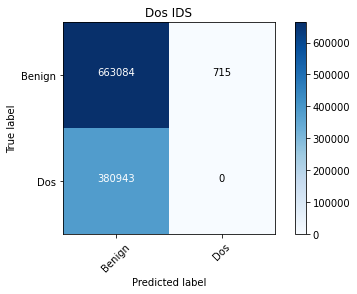

In [33]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [34]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

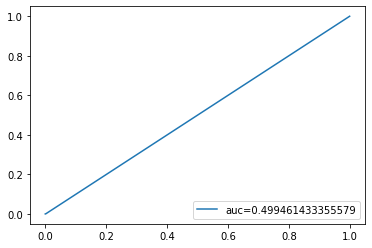

In [35]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()